In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from keras.utils import to_categorical
from keras.datasets import cifar10
from keras.applications.xception import Xception
from keras.layers import Dense, Flatten, Dropout
from keras.models import Sequential
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# Load CIFAR-10 dataset and preprocess the data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Split the training set into training and validation sets
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)


In [3]:
model_xception = Xception(weights='imagenet', include_top=False, input_shape=(71, 71, 3))

In [4]:
inp = keras.Input(shape=(32, 32 ,3))
inp_resized = keras.layers.Lambda(lambda X: tf.image.resize(X, (71, 71)))(inp)

In [5]:
X = model_xception(inp_resized, training=False)
X = Flatten()(X)
X = Dense(500, activation='relu')(X)
X - Dropout(0.3)(X)
outputs = Dense(10, activation='softmax')(X)
model = keras.Model(inp, outputs)
model_xception.trainable = False
model.compile(optimizer='nadam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model using the validation set for monitoring
batch_size = 300
epochs = 20
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val), verbose=1)

Epoch 1/10
150/150 [==============================] - 33s 101ms/step - loss: 1.2995 - accuracy: 0.6456 - val_loss: 0.8550 - val_accuracy: 0.7054
Epoch 2/10
150/150 [==============================] - 13s 84ms/step - loss: 0.7826 - accuracy: 0.7332 - val_loss: 0.8158 - val_accuracy: 0.7178
Epoch 3/10
150/150 [==============================] - 13s 86ms/step - loss: 0.6675 - accuracy: 0.7695 - val_loss: 0.8287 - val_accuracy: 0.7224
Epoch 4/10
150/150 [==============================] - 13s 86ms/step - loss: 0.5764 - accuracy: 0.7981 - val_loss: 0.8120 - val_accuracy: 0.7242
Epoch 5/10
150/150 [==============================] - 11s 75ms/step - loss: 0.4849 - accuracy: 0.8305 - val_loss: 0.8624 - val_accuracy: 0.7164
Epoch 6/10
150/150 [==============================] - 11s 76ms/step - loss: 0.4041 - accuracy: 0.8592 - val_loss: 0.9207 - val_accuracy: 0.7052
Epoch 7/10
150/150 [==============================] - 11s 76ms/step - loss: 0.3165 - accuracy: 0.8923 - val_loss: 0.9261 - val_accuracy

In [6]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test, batch_size=batch_size)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

34/34 [==============================] - 3s 60ms/step - loss: 1.1080 - accuracy: 0.7198
Test Loss: 1.1079987287521362
Test Accuracy: 0.7197999954223633


In [7]:
# plotting helper function
def plothist(hist):
    plt.rcParams["figure.figsize"] = (16, 8)
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.grid()
    plt.show()

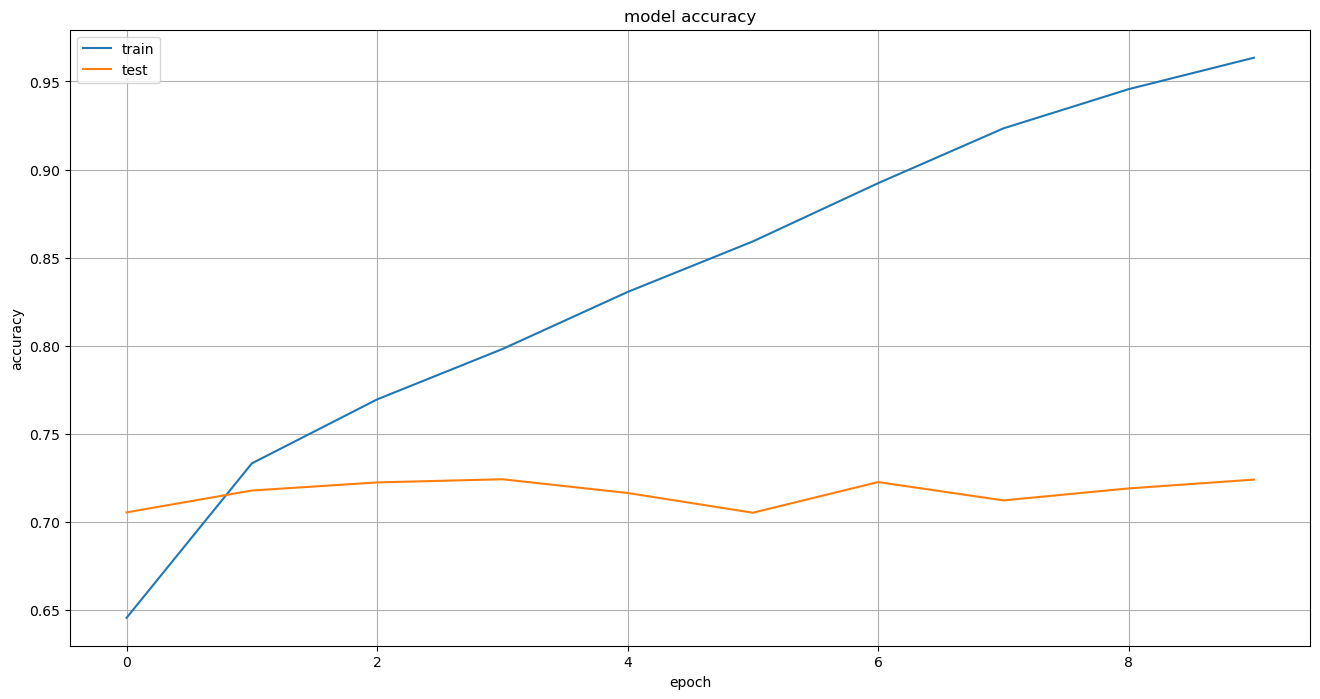

In [8]:
plothist(history)